# Anomaly Detection & Time Series

1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

Ans. Anomaly Detection in machine learning is the technique of identifying rare or unusual data points that deviate significantly from the expected pattern or norm in a dataset. These deviations often indicate critical incidents such as fraud, system failures, or errors.

There are three main types of anomalies:

  a) Point Anomalies: These occur when a single data point is far off from the rest of the data. For example, an unusually large credit card transaction compared to a user's typical spending pattern is a point anomaly.

  b) Contextual Anomalies: These are anomalies that are only unusual in a specific context. For example, a spike in electricity usage at 3 a.m. might be unusual and indicate a fault, whereas the same spike during daytime might be normal.

  c) Collective Anomalies: These arise when a set or sequence of data points together deviate from the norm, even if individual points appear normal. For example, a sudden surge in network traffic from multiple IP addresses at the same time could indicate a coordinated cyber attack.

Anomaly detection is especially important for time series data, where identifying such deviations helps in monitoring and predicting critical events.

2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

Ans. Isolation Forest (iForest) uses a tree-based approach to detect anomalies by isolating observations. It assumes anomalies are few and significantly different from normal data. Since anomalies get isolated quicker in the random partitioning process, isolation depth in trees helps identify them efficiently. This method is fast, handles high-dimensional data well, and is suited for global anomaly detection where outliers differ markedly from the bulk of data. It is widely used when time efficiency and scalability are critical.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adopts a density-based clustering approach. It groups points into clusters based on density and labels points in sparse regions outside dense clusters as outliers. It is especially useful for detecting anomalies in datasets with complex cluster shapes and noisy data. However, DBSCAN can struggle with clusters of varying densities. It’s ideal for spatial data or when anomalies manifest as noise relative to clusters.

Local Outlier Factor (LOF) also uses density but focuses on local neighborhoods. Instead of a binary inlier/outlier label, LOF assigns each point a score representing its degree of being an outlier relative to its neighbors. This makes it effective at detecting local anomalies that may not stand out globally but do show lower density in their local context. LOF requires careful tuning of neighborhood size and is preferred when local anomaly detection is important.

In summary, Isolation Forest excels at fast, global anomaly detection; DBSCAN is suited for noisy data with arbitrary cluster shapes to detect cluster noise as outliers; and LOF is best for finding local anomalies that defy global patterns. Selecting among these depends on the dataset characteristics and the nature of outliers sought.

3. What are the key components of a Time Series? Explain each with one
example.

Ans. Trend represents the long-term movement or direction in the data. For example, a steady increase in the average monthly sales of a product over several years indicates an upward trend showing growth.

Seasonality refers to repeating patterns or fluctuations that occur at regular intervals due to seasonal factors. For instance, ice cream sales peaking every summer month exhibit seasonality.

Cycle represents patterns that occur over longer periods but are not of fixed length like seasonal patterns. A business experiencing expansion and recession phases over several years shows cyclical behavior.

Irregularity or Noise captures random, unpredictable variations in the data that cannot be attributed to trend, seasonality, or cycle. An example would be sudden, unexpected drops or spikes in stock prices due to unforeseen events.

4. Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

Ans. Stationary in time series refers to a series whose statistical properties such as mean, variance, and autocorrelation remain constant over time. This means the series does not exhibit trends, seasonality, or changing variance, making it easier to model and forecast. For example, white noise is a stationary time series because it has a constant mean and variance over time, with no predictable patterns.

To test whether a series is stationary, common methods include the Augmented Dickey-Fuller (ADF) test, which statistically checks for the presence of a unit root indicating non-stationarity. Visual inspection of plots to assess constant mean and variance over time can also be a preliminary check.

Transforming a non-stationary series into a stationary one typically involves differencing (subtracting the previous observation from the current one) to remove trends, or applying transformations such as logarithms to stabilize variance. Seasonal differencing can address seasonality. After these transformations, retesting is done to confirm stationarity.

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

Ans. Autoregressive (AR) models use a time series’ own lagged values as predictors. The model expresses the current value as a linear combination of past values. AR models are suitable for data where past states strongly influence the present, like stock prices showing momentum.

Moving Average (MA) models focus on modeling the error terms (or shocks) from previous time steps to explain current observations. The current value is expressed as a function of past forecast errors. MA is useful when shocks or noise explain fluctuations better than past values themselves.

ARIMA (Autoregressive Integrated Moving Average) models combine AR and MA while adding differencing (integration) to handle non-stationary data by making it stationary. ARIMA thus models both autocorrelation and moving average components in a time series that may have trends but no seasonality. This makes it versatile for many real-world datasets like economic indicators.

SARIMA (Seasonal ARIMA) extends ARIMA by adding seasonal components to model periodic patterns or seasonality. Besides non-seasonal AR, I, MA, SARIMA includes seasonal autoregression, seasonal differencing, and seasonal moving average terms with a specified seasonal period. This is essential for time series with clear seasonal cycles, such as monthly sales data exhibiting yearly seasonality.

SARIMAX (Seasonal ARIMA with eXogenous regressors) further generalizes SARIMA by incorporating external variables (exogenous regressors) that may influence the series. This model is advantageous when explanatory variables outside the past observations and errors help forecast the series, like including temperature or holidays when modeling electricity demand.

In summary, AR models past values, MA models past errors, ARIMA combines both with differencing for stationarity, SARIMA adds seasonality modeling, and SARIMAX adds external regressors for enhanced predictive power depending on data characteristics and application needs.



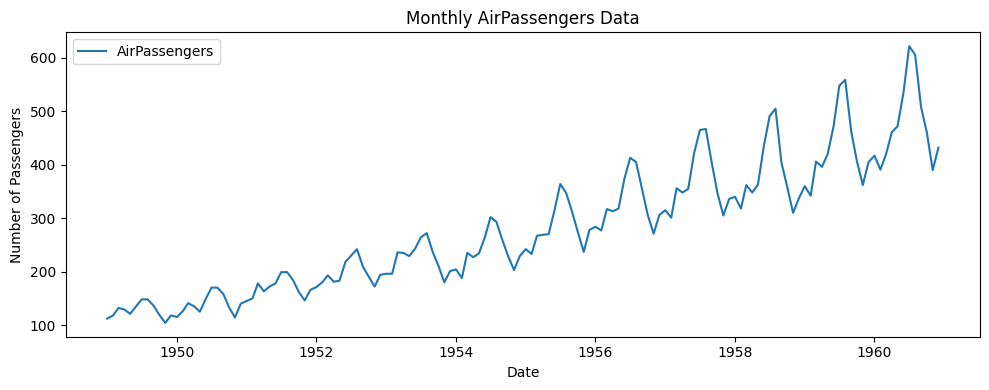

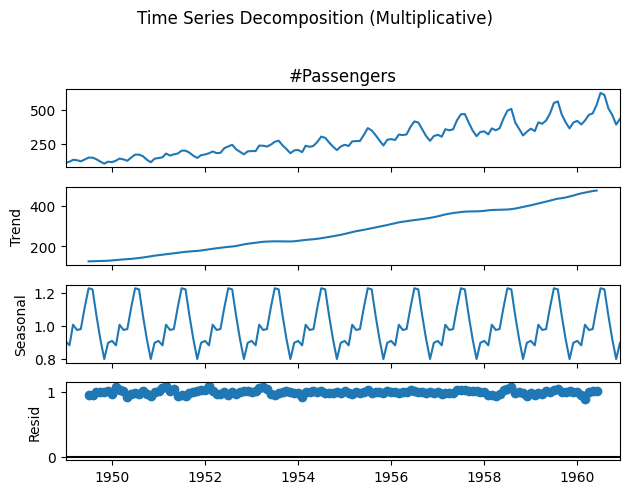

In [1]:
# 6) Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the AirPassengers data
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Plot the original time series
plt.figure(figsize=(10,4))
plt.plot(data['#Passengers'], label='AirPassengers')
plt.title('Monthly AirPassengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.tight_layout()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(data['#Passengers'], model='multiplicative')

# Plot decomposed components (trend, seasonality, residual)
decomposition.plot()
plt.suptitle('Time Series Decomposition (Multiplicative)', y=1.02)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3332362894.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('NYC_taxi_fare_data.csv')  # Update filename as uploaded


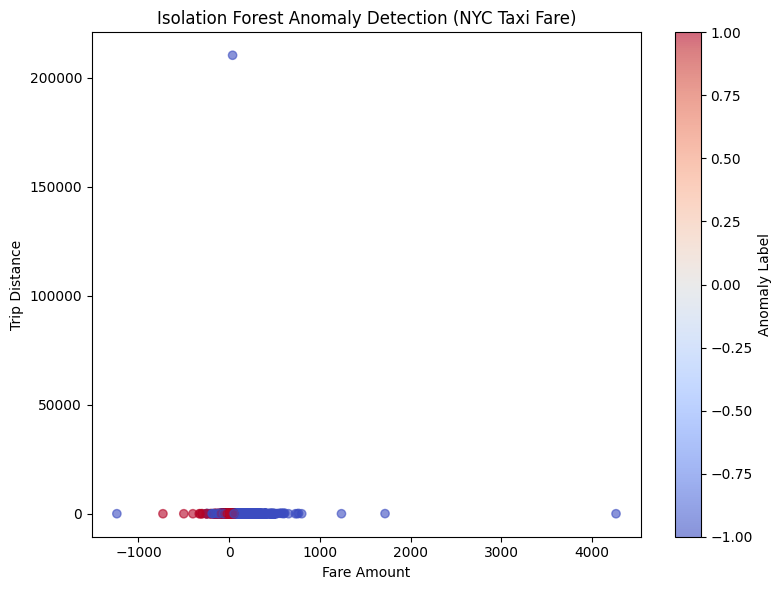

In [10]:
# 7) Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load NYC Taxi Fare dataset
data = pd.read_csv('NYC_taxi_fare_data.csv')  # Update filename as uploaded
X = data[['fare_amount', 'trip_distance']].dropna()  # Use relevant features

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.02)
data['anomaly'] = iso_forest.fit_predict(X)

# Scatter plot with anomalies highlighted
plt.figure(figsize=(8,6))
plt.scatter(X['fare_amount'], X['trip_distance'], c=data['anomaly'], cmap='coolwarm', marker='o', alpha=0.6)
plt.xlabel('Fare Amount')
plt.ylabel('Trip Distance')
plt.title('Isolation Forest Anomaly Detection (NYC Taxi Fare)')
plt.colorbar(label='Anomaly Label')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


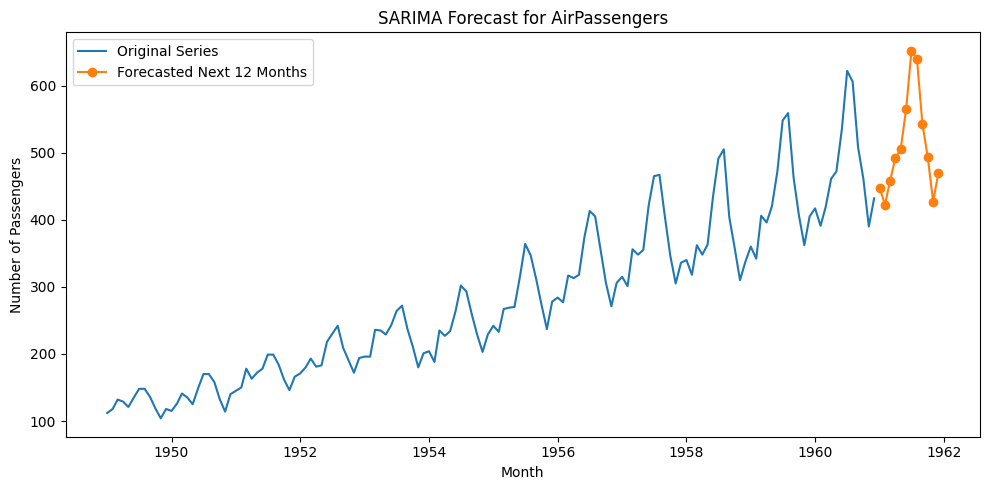

In [11]:
# 8) Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.


import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']

# Train SARIMA model
model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=series.index[-1]+pd.DateOffset(months=1), periods=12, freq='MS')
forecast_values = forecast.predicted_mean

# Plot original and forecast
plt.figure(figsize=(10,5))
plt.plot(series, label='Original Series')
plt.plot(forecast_index, forecast_values, label='Forecasted Next 12 Months', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('SARIMA Forecast for AirPassengers')
plt.legend()
plt.tight_layout()
plt.show()


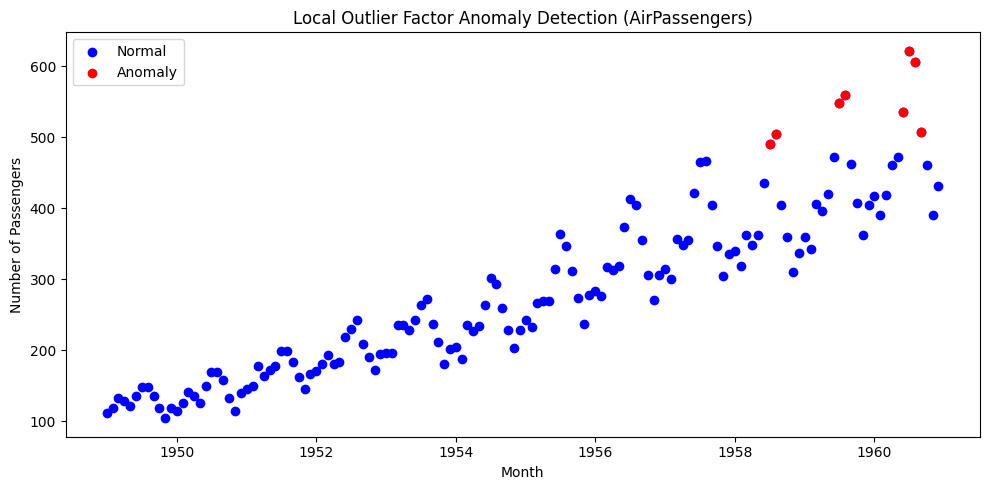

In [12]:
# 9) Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load AirPassengers dataset
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
X = data['#Passengers'].values.reshape(-1, 1)

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
preds = lof.fit_predict(X)
scores = lof.negative_outlier_factor_

# Visualize anomalies
anomaly_mask = preds == -1
plt.figure(figsize=(10,5))
plt.scatter(data.index, X, c='blue', label='Normal')
plt.scatter(data.index[anomaly_mask], X[anomaly_mask], c='red', label='Anomaly')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Local Outlier Factor Anomaly Detection (AirPassengers)')
plt.legend()
plt.tight_layout()
plt.show()


10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:

    ● How would you detect anomalies in this streaming data (Isolation Forest / LOF /DBSCAN)?
    ● Which time series model would you use for short-term forecasting (ARIMA /SARIMA / SARIMAX)?
    ● How would you validate and monitor the performance over time?
    ● How would this solution help business decisions or operations?

Ans. Real-time Data Science Workflow for Power Grid Monitoring

Anomaly Detection:

For real-time streaming data with frequent updates (every 15 minutes), I would use Isolation Forest or Local Outlier Factor (LOF) for anomaly detection.

  a) Isolation Forest is fast, scalable, and suitable for large and high-dimensional streaming data. It isolates abnormal spikes or drops in energy usage quickly and can be retrained incrementally.

  b) LOF would help detect local anomalies, like sudden but contextually extreme changes in energy consumption for specific regions or weather patterns.

  c) If spatial clusters (regions in the grid) are important, DBSCAN can be useful to identify point anomalies relative to clusters, especially for regional outliers.
  Typically, Isolation Forest is preferred for efficiency and ease of integration with streaming frameworks.

Short-Term Forecasting Model:
For forecasting energy demand, I would use the SARIMAX model.

  a) SARIMAX extends SARIMA by including exogenous features like weather conditions and region, which can significantly impact energy usage in real time.

  b) Its built-in support for seasonality and external variables makes it ideal for short-term (e.g., next few hours) forecasts with complex influences.

  c) If exogenous features were unavailable, SARIMA would be the next choice for seasonality and ARIMA for less complex patterns.

Validation and Monitoring:

  a) Use a rolling window and time-based cross-validation where the model is retrained and validated on recent data segments.

  b) Track metrics such as RMSE, MAE (for forecasts) and precision/recall (for anomaly detection).

  c) Implement automated monitoring dashboards showing prediction accuracy and number/severity of detected anomalies.

  d) Regularly update models with new data and retrain when performance degrades.

  e) Apply alerting rules on prediction errors and anomaly scores for prompt human review.

Business Impact:

  a) Accurate forecasts help optimize power generation and grid distribution, reducing costs from over/under-supply.

  b) Real-time anomaly detection enables fast identification and resolution of incidents (spikes, drops, outages, equipment faults), minimizing downtime and improving grid reliability.

  c) Automated insights improve operational efficiency, demand response, and customer satisfaction.

  d) Decision-makers can allocate resources and maintenance more effectively, ensuring stable operations in dynamic environments.

Summary:

  The approach combines real-time anomaly detection (Isolation Forest/LOF), robust forecasting (SARIMAX), and continuous validation/monitoring, directly supporting efficient, reliable, and smart business operations in power grid management.